In [39]:
#Ignoring Warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

# Dependency Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

This is just to show the dataset a bit clearer. The dataset is a bunch of measureable variables that I can use in my Graphs. The text file included on GitHub shows what all the variable types are, most are binary values, Yes/No. 

In [4]:
studentStudies = pd.read_csv("student-mat.csv", delimiter=';') #Loading up my Dataset using the csv provided on the Github.
studentStudies.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


The first piece of data I want to represent in 3D is the amount of travel time, student age, and the amount of absences. This can tell you how much travel time effects, if it does, the amount a student is absent. You can find out if a student is absent a lot, if they live far away and that could be the reason. The data actually showed though that the short distance was more likely to be absent and the most absent student live 15-30 minutes away. The data can also be tilted by the amount of students that live nearby vs. far away so I took care of that graph in the next one.

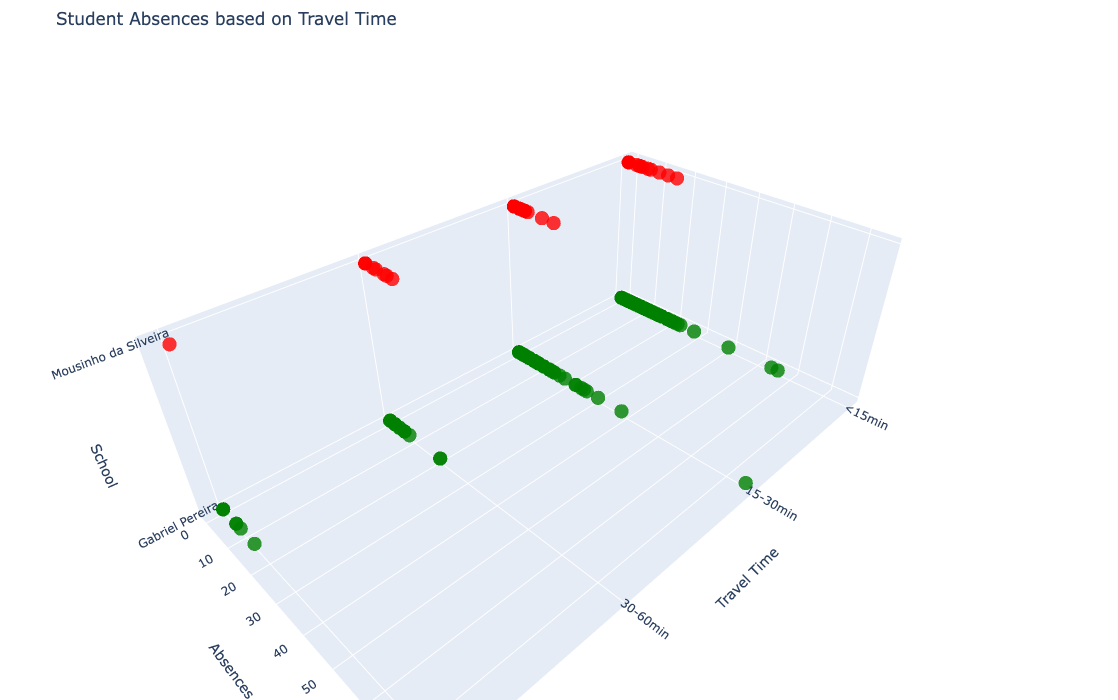

In [62]:


fig = go.Figure()

# Mapping the studytime variables to usable labels for the data I'm using, also the school names, and color scheme
studentStudies['traveltime2']= studentStudies['traveltime'].map({1:'<15min' , 2: '15-30min', 3:'30-60min', 4:'>1hr'})
studentStudies['schoolNames']= studentStudies['school'].map({"GP": "Gabriel Pereira", "MS": "Mousinho da Silveira"})
schoolColors = {"GP": "green", "MS": "red"}

fig.add_trace(go.Scatter3d(
        x=studentStudies['traveltime2'],    # x-axis: travel times
        y=studentStudies['absences'],     # y-axis: amount of absences
        z=studentStudies['schoolNames'],    # z-axis: Schools
        mode="markers",              # display points
        marker=dict(
            size=8,                  # marker size
            color=studentStudies['school'].map(schoolColors), #mapping the school colors I mapped up above to respective schools GP and MS.
            opacity=0.8              # marker opacity
        ),
        name='Schools'               
    ))

fig.update_layout(
    title="Student Absences based on Travel Time",
    scene=dict(
        xaxis=dict(
            type='category',  # Treat as categorical data
            categoryorder='array',  # Use explicit order
            categoryarray=['<15min', '15-30min', '30-60min', '>1hr']  # the explicit order I'm using
        ),
        xaxis_title="Travel Time",
        yaxis_title="Absences",
        zaxis_title="School"
    ),
    width=700,                    # Figure width in pixels
    height=700,                   # Figure height in pixels
    margin=dict(l=0, r=0, b=0, t=50)  # Margins around the plot
)



This is a graph that shows the amount of travel time for students from two different schools. The data showed most students go to Gabriel Pereira and not Mousinho da Silveira, while also showing that the cause may be because a ton of people live so close to Gabriel Pereira. This graph can be used in correlation, or not, to the first scatter plot to further the understanding of the data. There is more possibility to have a student with a lot of absences at Gabriel Pereira because there is so many students that live nearby vs far away, so the sample size is bigger. 

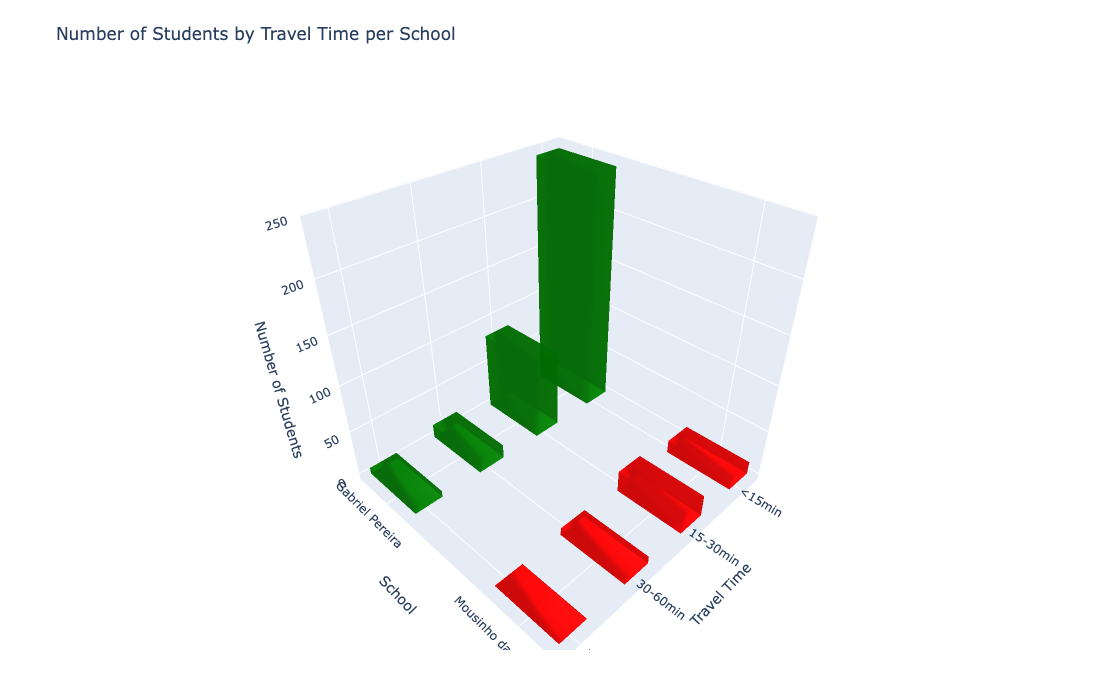

In [11]:
# Counting up all of the students per travel time x school.
counts = studentStudies.groupby(['traveltime2', 'schoolNames']).size().unstack()
schoolColors = {'Gabriel Pereira': "green", "Mousinho da Silveira": "red"}
# Bar dimensions
dx, dy = 0.4, 0.4

traces = []
for i, time in enumerate(['<15min', '15-30min', '30-60min', '>1hr']):
    for j, school in enumerate(counts.columns):
        height = counts.loc[time, school]
        # Bar vertices
        vertices = np.array([
            [i-dx/2, j-dy/2, 0], [i+dx/2, j-dy/2, 0],
            [i+dx/2, j+dy/2, 0], [i-dx/2, j+dy/2, 0],
            [i-dx/2, j-dy/2, height], [i+dx/2, j-dy/2, height],
            [i+dx/2, j+dy/2, height], [i-dx/2, j+dy/2, height]
        ])
        # Bar faces
        faces = [[0,1,2],[0,2,3],[4,5,6],[4,6,7],
                 [0,1,5],[0,5,4],[1,2,6],[1,6,5],
                 [2,3,7],[2,7,6],[3,0,4],[3,4,7]]
        i_faces, j_faces, k_faces = zip(*faces)
        
        traces.append(go.Mesh3d(
            x=vertices[:,0], y=vertices[:,1], z=vertices[:,2],
            i=i_faces, j=j_faces, k=k_faces,
            color=schoolColors[school],
            opacity=0.8,
            name=f"{time} - {school}"
        ))

# Create figure
fig = go.Figure(data=traces)
fig.update_layout(
    title="Number of Students by Travel Time per School",
    scene=dict(
        xaxis=dict(title="Travel Time", tickvals=[0,1,2,3], 
                  ticktext=['<15min', '15-30min', '30-60min', '>1hr']),
        yaxis=dict(title="School", tickvals=[0,1], 
                  ticktext=list(schoolColors.keys()),
                  tickangle=45, tickfont=dict(size=12)),
        zaxis_title="Number of Students"
    ),
    margin=dict(l=50, r=50, b=50, t=80),
    width=700,
    height=700
)
fig.show()

This next dataset had a bit to many values in it so I decided to only keep the amounts of absences where there was actually student data, not 0 students, to trim it down a bit to be more readable. It does take a jump in data at the end for absences but I believe the amount of students in the higher absences is less relevant data and easier to distinguish since it is so barren. This graph, unlike the first, shows the amount of students with certain amounts of absences aggregated together to see, as a whole and more connected structure, the tendencies of the student body which could be due to retention, boredom, mental health, etc. Basically the graph CWU looked at and decided we need to take attendance. 


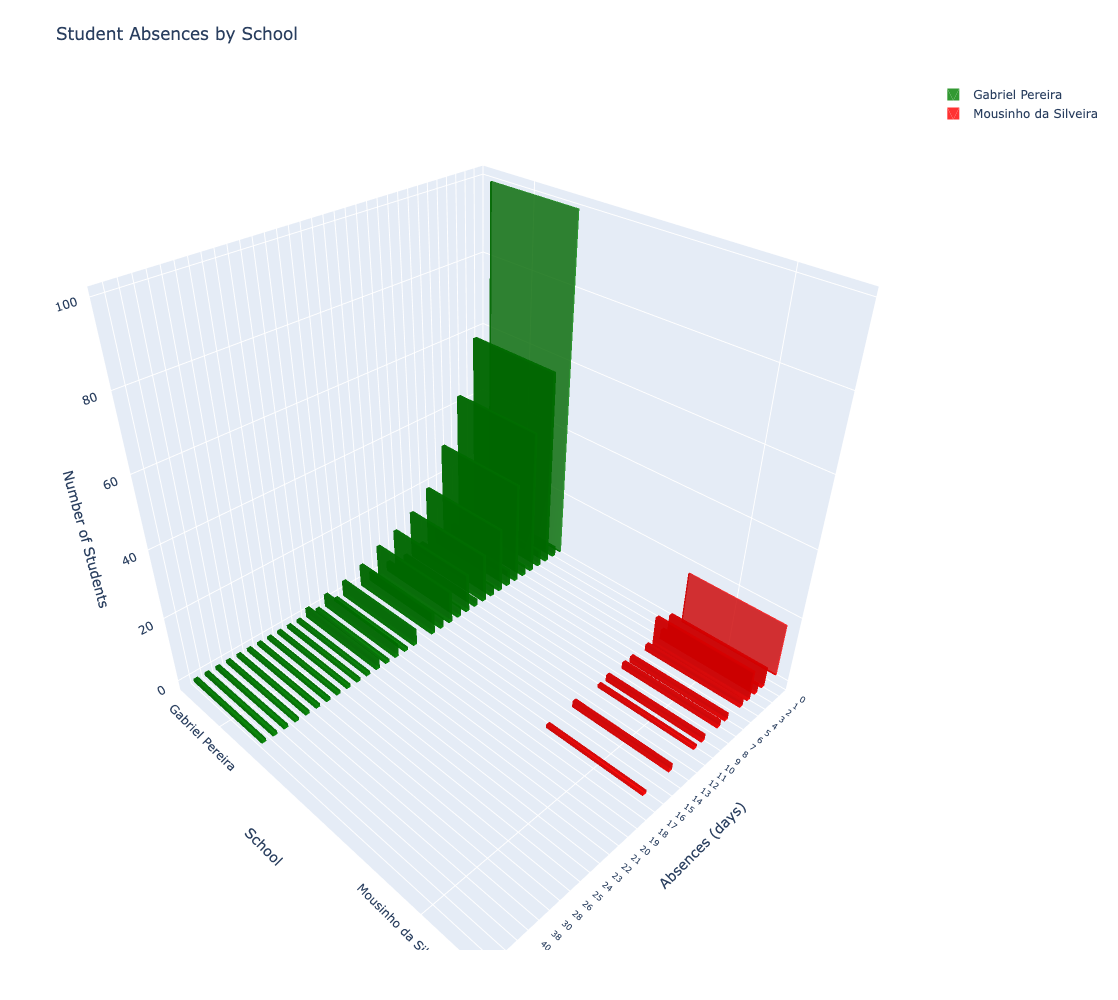

In [13]:
# Aggregate absences by school and absence amount
counts = studentStudies.groupby(['schoolNames', 'absences']).size().unstack().fillna(0)

# Define dimensions same as the demo code, just altereddx, dy = 0.4, 0.4  # Keep your original bar dimensions

traces = []
for i, absence in enumerate(counts.columns):  # X-axis: Absences
    for j, school in enumerate(counts.index):  # Y-axis: Schools
        if counts.loc[school, absence] > 0:
            height = counts.loc[school, absence]
            
            # Vertexs from the Example code
            x0, x1 = i - dx/2, i + dx/2
            y0, y1 = j - dy/2, j + dy/2
            vertices = np.array([
                [x0, y0, 0], [x1, y0, 0], [x1, y1, 0], [x0, y1, 0],
                [x0, y0, height], [x1, y0, height], [x1, y1, height], [x0, y1, height]
            ])
            
            # Face code from the example code
            faces = [[0,1,2],[0,2,3],
                    [4,5,6],[4,6,7],
                    [0,1,5],[0,5,4],
                    [1,2,6],[1,6,5],
                    [2,3,7],[2,7,6],
                    [3,0,4],[3,4,7]]
            i_faces, j_faces, k_faces = zip(*faces)
            
            traces.append(go.Mesh3d(
                x=vertices[:, 0],
                y=vertices[:, 1],
                z=vertices[:, 2],
                i=i_faces, j=j_faces, k=k_faces,
                color=schoolColors[school],
                opacity=0.8,
                name=school,
                showlegend=(i==0)  # Only show legend once per school
            ))

# Setting up some stuff for all the axis.
fig = go.Figure(data=traces)
fig.update_layout(
    title="Student Absences by School",
    scene=dict(
        # X axis settings
        xaxis=dict(
            title="Absences (days)",
            tickvals=list(range(len(counts.columns))),
            ticktext=[str(a) for a in counts.columns],
            tickfont=dict(size=10),
            range=[0, len(counts.columns)]
            
        ),
        # Y axis settings
        yaxis=dict(
            title="School",
            tickvals=list(range(len(counts.index))),
            ticktext=list(counts.index),
            tickangle=45
        ),
        # Z axis settings
        zaxis_title="Number of Students"
    ),
    margin=dict(l=50, r=50, b=50, t=80),
    width=1000,
    height=1000
)
fig.show()

This is a good representation of the reasons why people applied to each school. This can be used to find out where you are lacking, or where you are doing great. Mousinho seems to not have a good reputation in comparison to Gabriel Pereira. I think this is signs of a good trend and this should be a sign for Mousinho to re-evaluate themselves and maybe ask the student body, kind of like how CWU does the surveys for classes afterwards to give feedback.

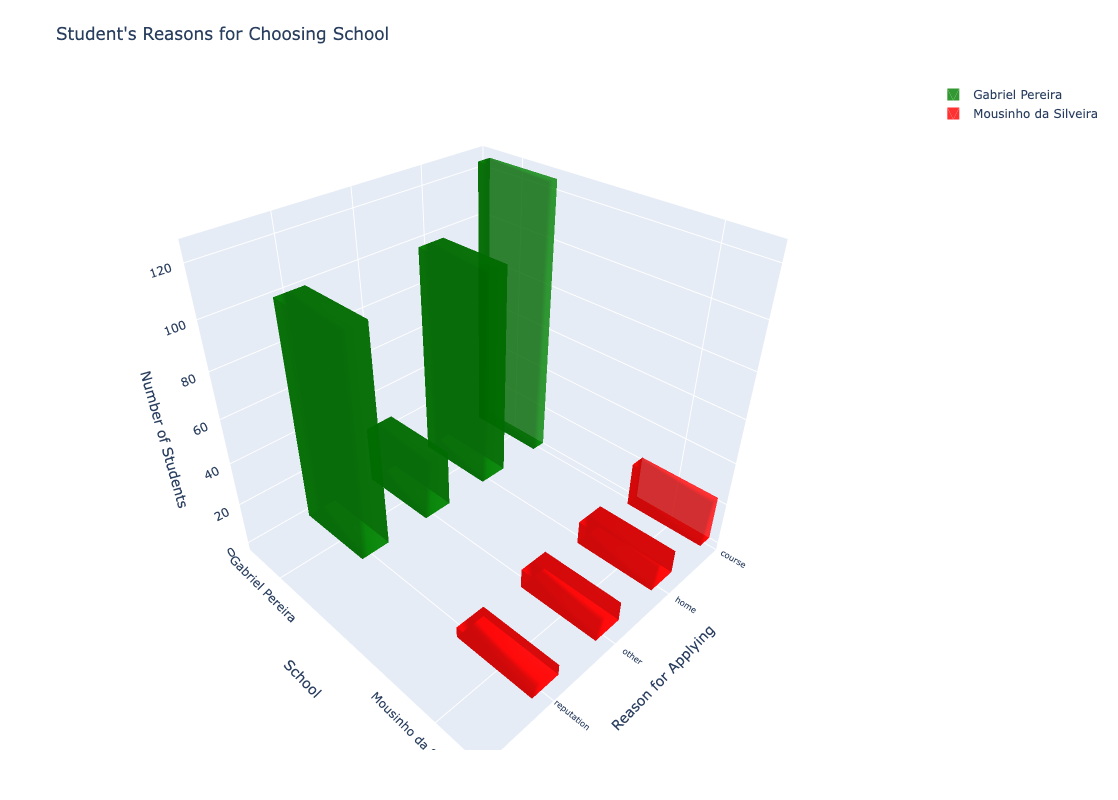

In [58]:
# Aggregate absences by school and reason amount
counts = studentStudies.groupby(['schoolNames', 'reason']).size().unstack().fillna(0)

# Define dimensions
dx, dy = 0.4, 0.4 

traces = []
for i, absence in enumerate(counts.columns):  # X-axis: reason
    for j, school in enumerate(counts.index):  # Y-axis: schoolNames
        if counts.loc[school, absence] > 0:
            height = counts.loc[school, absence]
            
            # Vertexs from the Example code
            x0, x1 = i - dx/2, i + dx/2
            y0, y1 = j - dy/2, j + dy/2
            vertices = np.array([
                [x0, y0, 0], [x1, y0, 0], [x1, y1, 0], [x0, y1, 0],
                [x0, y0, height], [x1, y0, height], [x1, y1, height], [x0, y1, height]
            ])
            
            # Face code from the example code
            faces = [[0,1,2],[0,2,3],
                    [4,5,6],[4,6,7],
                    [0,1,5],[0,5,4],
                    [1,2,6],[1,6,5],
                    [2,3,7],[2,7,6],
                    [3,0,4],[3,4,7]]
            i_faces, j_faces, k_faces = zip(*faces)
            
            traces.append(go.Mesh3d(
                x=vertices[:, 0],
                y=vertices[:, 1],
                z=vertices[:, 2],
                i=i_faces, j=j_faces, k=k_faces,
                color=schoolColors[school], #Color scheme is in a earlier jupyter node, make sure to initialize it if this isn't working.
                opacity=0.8,
                name=school,
                showlegend=(i==0)  # Only show legend once per school
            ))

# Setting up some stuff for all the axis.
fig = go.Figure(data=traces)
fig.update_layout(
    title="Student's Reasons for Choosing School",
    scene=dict(
        # X axis settings
        xaxis=dict(
            title="Reason for Applying",
            tickvals=list(range(len(counts.columns))),
            ticktext=[str(a) for a in counts.columns],
            tickfont=dict(size=10),
            range=[0, len(counts.columns)]
            
        ),
        # Y axis settings
        yaxis=dict(
            title="School",
            tickvals=list(range(len(counts.index))),
            ticktext=list(counts.index),
            tickangle=45
        ),
        # Z axis settings
        zaxis_title="Number of Students"
    ),
    margin=dict(l=50, r=50, b=50, t=80),
    width=800,
    height=800
)
fig.show()

This dataset is a good way to correlate amount of studying to the amount students pass classes. This can be very useful to further justify the need for studying, and the positive correlation between studying and success in your classes. The data shows the people who studied lower had a higher rate of classes failed than those who studied for than 2 hours and beyond. I believe this data could be an eye opener for some students if a fail rate was at an extreme it could be very effective showing them, but would have to be partnered with study stratagies to put into effect for students.

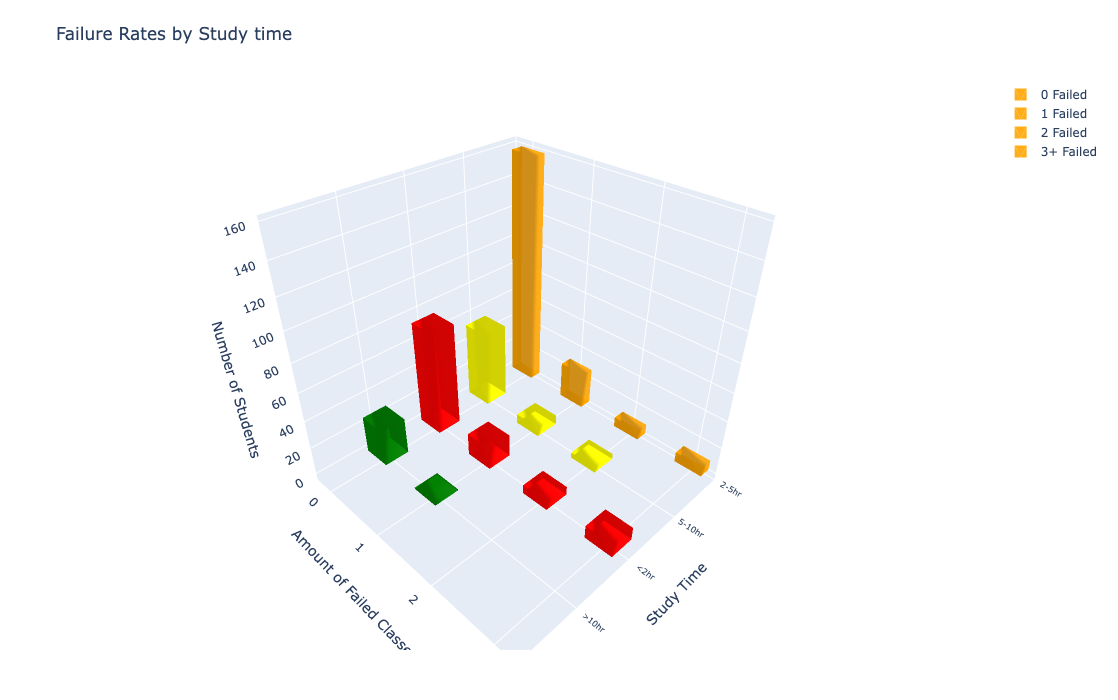

In [56]:
# Mapping the studytime variables to usable labels for the data I'm using
studentStudies['studytime2']= studentStudies['studytime'].map({1:'<2hr' , 2: '2-5hr', 3:'5-10hr', 4:'>10hr'})

# aggregating the failure rate for each studytime
counts = studentStudies.groupby(['failures', 'studytime2']).size().unstack().fillna(0)

# Define dimensions
dx, dy = 0.4, 0.4 

studytimeColors = {'<2hr': 'red', '2-5hr':'orange', '5-10hr':'yellow', '>10hr':'green'} # colors to show a nice scheme of less studying is more red, more studying is green
failuresMap = {0: '0 Failed', 1: '1 Failed', 2: '2 Failed', 3: '3+ Failed'}

traces = []
for i, studytime in enumerate(counts.columns):  # X-axis: studytime
    for j, failures in enumerate(counts.index):  # Y-axis: failures amounts
        if counts.loc[failures, studytime] > 0:
            height = counts.loc[failures, studytime]
            
            # Vertexs from the Example code
            x0, x1 = i - dx/2, i + dx/2
            y0, y1 = j - dy/2, j + dy/2
            vertices = np.array([
                [x0, y0, 0], [x1, y0, 0], [x1, y1, 0], [x0, y1, 0],
                [x0, y0, height], [x1, y0, height], [x1, y1, height], [x0, y1, height]
            ])
            
            # Face code from the example code
            faces = [[0,1,2],[0,2,3],
                    [4,5,6],[4,6,7],
                    [0,1,5],[0,5,4],
                    [1,2,6],[1,6,5],
                    [2,3,7],[2,7,6],
                    [3,0,4],[3,4,7]]
            i_faces, j_faces, k_faces = zip(*faces)
            
            traces.append(go.Mesh3d(
                x=vertices[:, 0],
                y=vertices[:, 1],
                z=vertices[:, 2],
                i=i_faces, j=j_faces, k=k_faces,
                color=studytimeColors[studytime], #Color scheme is in a earlier jupyter node, make sure to initialize it if this isn't working.
                opacity=0.9,
                name=failuresMap[failures],
                showlegend=(i==0)
            ))

# Setting up some stuff for all the axis.
fig = go.Figure(data=traces)
fig.update_layout(
    title="Failure Rates by Study time",
    scene=dict(
        # X axis settings
        xaxis=dict(
            title="Study Time",
            tickvals=list(range(len(counts.columns))),
            ticktext=[str(a) for a in counts.columns],
            tickfont=dict(size=10),
            range=[0, len(counts.columns)]
            
        ),
        # Y axis settings
        yaxis=dict(
            title="Amount of Failed Classes",
            tickvals=list(range(len(counts.index))),
            ticktext=list(counts.index),
            tickangle=45
        ),
        # Z axis settings
        zaxis_title="Number of Students"
    ),
    margin=dict(l=50, r=50, b=50, t=80),
    width=700,
    height=700
)
fig.show()